#How to Perform Face Detection with Deep Learning
Refrences:

1. Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf

2. https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/


In [0]:
#@title Import Required basic packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#@title Install mtcnn packages
!pip install mtcnn

     |████████████████████████████████| 2.3MB 29.4MB/s 


# Drive mounting and changing the working directory to face_detection directory

In [3]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
os.chdir('drive/My Drive/Face Detection')

In [0]:
!ls

we can see that we are using version 0.0.8 of the library.

In [5]:
pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras, opencv-python
Required-by: 


In [6]:
import mtcnn
# print version
print(mtcnn.__version__)

Using TensorFlow backend.


0.1.0


In [0]:
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image

# Function required to visualize the result
1. draw_image_with_boxes(filename, result_list,key_point=False) : *Require to disply the photograph with bounding box of detected images. if key_point=True, the eye, nose, and mouth will also visiable.*
2. draw_faces(filename, result_list): *Show the crop face detected in an image.*
3. blur_face(filename, result_list): *Shows the images with blur faces*

In [0]:
#@title function named draw_image_with_boxes() that shows the photograph and then draws a box for each bounding box detected.
def draw_image_with_boxes(filename, result_list,key_point=False):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        if key_point:
            for key, value in result['keypoints'].items():
            # create and draw dot
                dot = Circle(value, radius=2, color='red')
                ax.add_patch(dot)
    # show the plot
    plt.show()

In [0]:
#@title function named draw_faces() that shows the each faces detected.
from PIL import Image
def draw_faces(filename, result_list, face_return=False):
	# load the image
	data = plt.imread(filename)
	face_images=[]
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		plt.subplot(1, len(result_list), i+1)
		plt.axis('off')
		# plot face
		face_image=data[y1:y2, x1:x2]
		plt.imshow(face_image)
		if face_return:
			face_image=Image.fromarray(face_image)
			face_image=face_image.resize((224,224))
			face_image=np.asarray(face_image)
			face_images.append(face_image)
	# show the plot
	plt.show()
	if face_return:
		return face_images

In [0]:
#@title function named blur_faces() that shows the photograph with their blur faces
from scipy import signal
def blur_faces(filename, result_list):
    data=plt.imread(filename,cv2.IMREAD_COLOR)
    data1=np.copy(data)
    print(data1.shape)
    dim=data.shape[-1]
    for i in range(len(result_list)):
        x, y, width, height = result_list[i]['box']
        for j in range(dim):
            face=data[y:y+height,x:x+width,j]
            mask=np.ones((17,17),'float32')/(17*17)
            face=signal.convolve2d(face, mask, boundary='symm', mode='same')
            data1[y:y+height,x:x+width,j]=face
    data1=data1.astype('uint8')
    plt.imshow(data1)
    plt.show()
    plt.axis('off')

# Tesing the result on still images

{'box': [320, 268, 31, 41], 'confidence': 0.9999721050262451, 'keypoints': {'left_eye': (330, 286), 'right_eye': (345, 285), 'nose': (339, 296), 'mouth_left': (331, 301), 'mouth_right': (345, 301)}}
{'box': [226, 39, 30, 40], 'confidence': 0.9999593496322632, 'keypoints': {'left_eye': (233, 56), 'right_eye': (248, 55), 'nose': (241, 63), 'mouth_left': (234, 70), 'mouth_right': (249, 69)}}
{'box': [373, 155, 31, 43], 'confidence': 0.9999196529388428, 'keypoints': {'left_eye': (380, 173), 'right_eye': (394, 171), 'nose': (387, 181), 'mouth_left': (382, 188), 'mouth_right': (396, 186)}}
{'box': [432, 45, 33, 45], 'confidence': 0.9998043179512024, 'keypoints': {'left_eye': (439, 64), 'right_eye': (454, 60), 'nose': (447, 70), 'mouth_left': (443, 78), 'mouth_right': (457, 74)}}
{'box': [133, 30, 29, 40], 'confidence': 0.9997820258140564, 'keypoints': {'left_eye': (141, 45), 'right_eye': (156, 45), 'nose': (148, 53), 'mouth_left': (140, 58), 'mouth_right': (155, 59)}}
{'box': [63, 149, 31, 3

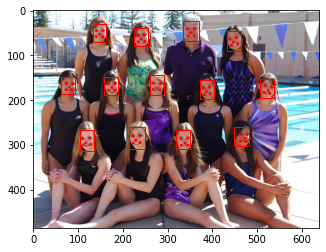

In [12]:
#@title Testing on test data 
filename = './Images/test2.jpg'
pixels = plt.imread(filename)
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)
draw_image_with_boxes(filename, faces,key_point=True)

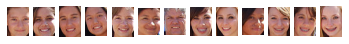

In [13]:
draw_faces(filename, faces)

(486, 640, 3)


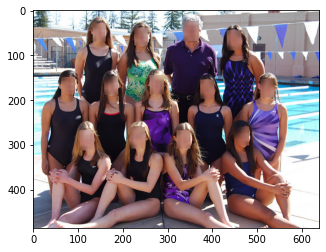

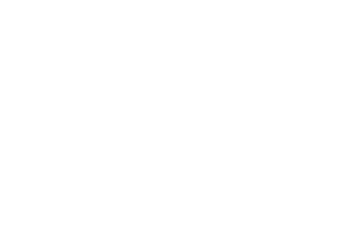

In [14]:
blur_faces(filename, faces)

# Face Recognisation using VGGFace algorithm
https://www.sitepoint.com/keras-face-detection-recognition/
